In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\8.twospirals.csv", header=None)
df

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0
...,...,...,...
1995,-3.213608,1.543994,1
1996,5.577210,2.359087,1
1997,-1.393598,-7.876754,1
1998,-7.708972,-4.298002,1


In [62]:
df.shape

(2000, 3)

In [63]:
df[[0,1]]

,0,1
0,-2.543456,-10.816358
1,9.434466,-2.572000
2,3.368646,-10.194671
3,1.341407,-4.204140
4,9.547758,-2.220580
...,...,...
1995,-3.213608,1.543994
1996,5.577210,2.359087
1997,-1.393598,-7.876754
1998,-7.708972,-4.298002


<AxesSubplot:xlabel='0', ylabel='1'>

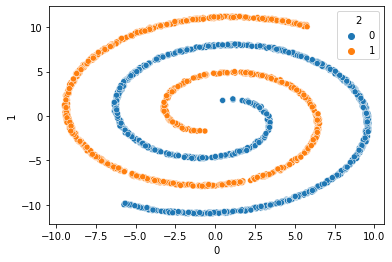

In [64]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [65]:
X = df[[0,1]]
y=df[2]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [67]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [68]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [69]:
# Implement Neural Networks for classification task and decision boundary
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [70]:

model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer = "he_uniform",input_dim = 2))

model.add(Dense(8,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(7,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(6,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(5,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(3,activation='relu', kernel_initializer = "he_uniform"))

model.add(Dense(2,activation='relu', kernel_initializer = "he_uniform"))
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [72]:
save = model.fit(x_train, y_train, epochs = 300, validation_split= 0.2)

Epoch 1/300
40/40 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.5836 - val_loss: 0.6909 - val_accuracy: 0.5969
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5789 - val_loss: 0.6735 - val_accuracy: 0.6156
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.5930 - val_loss: 0.6499 - val_accuracy: 0.6438
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6406 - val_loss: 0.6450 - val_accuracy: 0.6781
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6516 - val_loss: 0.6419 - val_accuracy: 0.6812
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6680 - val_loss: 0.6382 - val_accuracy: 0.6750
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6680 - val_loss: 0.6353 - val_accuracy: 0.6719
Epoch 8/300
4

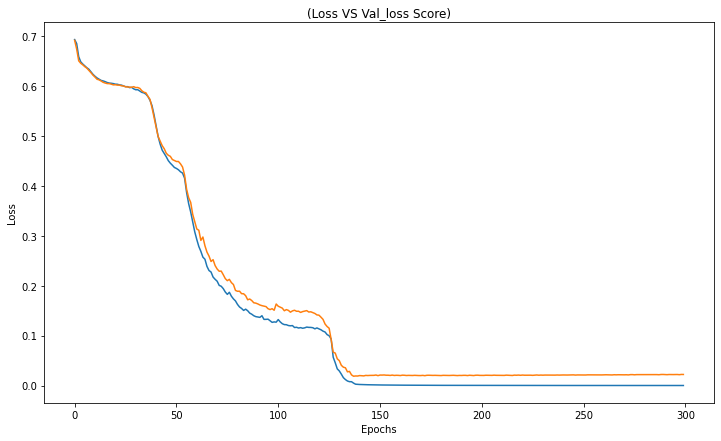

In [73]:
 #history.history['loss'], history.history['val_loss'] 
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [74]:
y_pred=model.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [75]:
y_capf=np.where(y_pred>0.5,1,0)


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

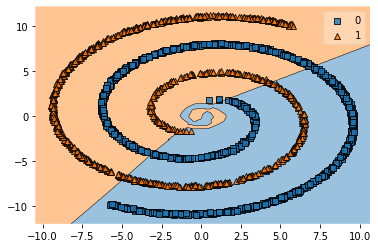

In [77]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 1ms/step


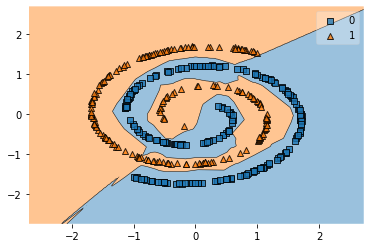

In [79]:
plot_decision_regions(x_test, y_test.values.astype(int), clf = model);